In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# where we can't ues kmeans?
if our clusters our not the same size kmeans wouldn't work well

In [2]:
df = pd.read_csv('Aggregation.csv')
print(df.shape)
df.head()

(787, 3)


,15.55,28.65,2
0,14.90,27.55,2
1,14.45,28.35,2
2,14.15,28.80,2
3,13.75,28.05,2
4,13.35,28.45,2


In [4]:
cdf = df.iloc[:, 0:2].values
cdf

array([[14.9 , 27.55],
       [14.45, 28.35],
       [14.15, 28.8 ],
       ...,
       [ 8.5 ,  3.25],
       [ 8.1 ,  3.55],
       [ 8.15,  4.  ]], shape=(787, 2))

In [14]:
cdf[:, 0][:5]

array([14.9 , 14.45, 14.15, 13.75, 13.35])

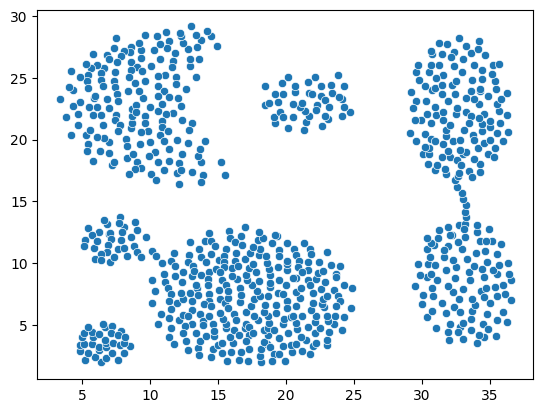

In [16]:
sns.scatterplot(x=cdf[:, 0], y=cdf[:, 1]);
# from the scatterplot it seems we would have 7 clusters with different sizes

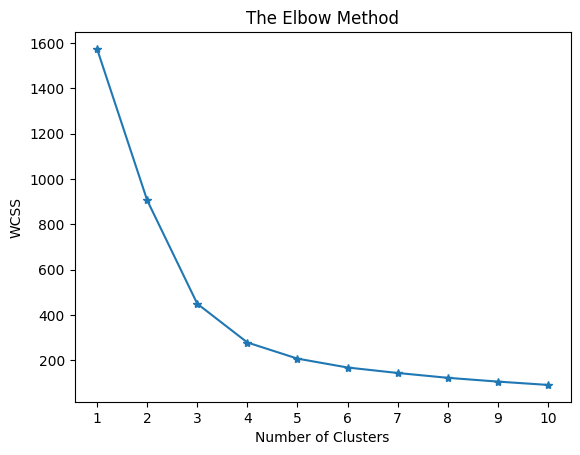

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

wcss = []
for i in range(1, 11): 

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10))
    ])

    pipe.fit(cdf)
    wcss.append(pipe.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

[0 1 2 3]


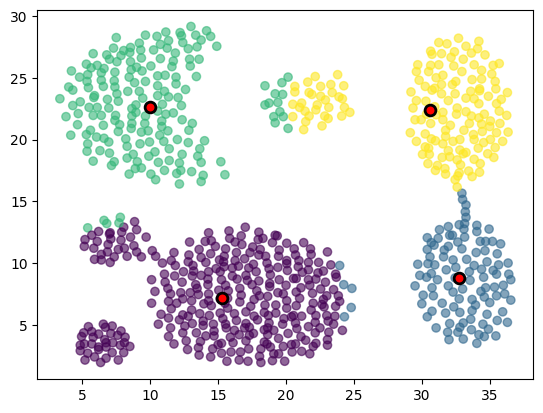

In [53]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3 4]


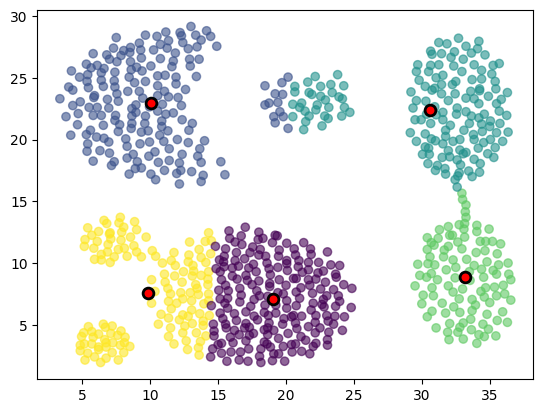

In [54]:
# as we saw it didn't work well with k=3
# let's try other ks

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3 4 5]


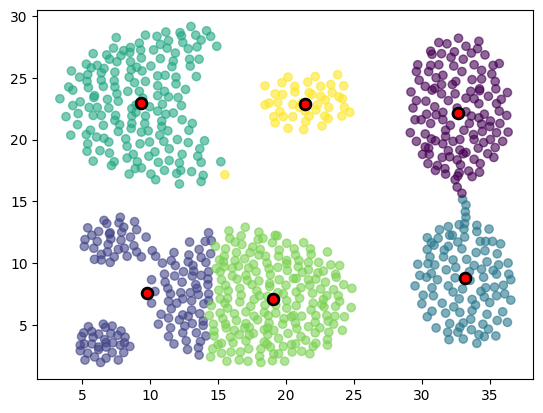

In [ ]:
# k=5 was also not good
# let's try k=6

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3 4 5 6]


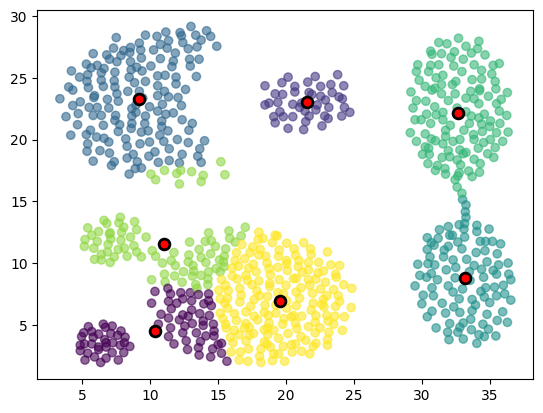

In [57]:
# k=6 is better but still not the best, what about k=7?

kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

In [58]:
# k=7 was worse
# we conclude that kmeans has flaws with clusters with different sizes and this is one of its limitation

# second limitations:
if clusters are not circular or spherical kmeans wouldn't work well

In [59]:
df = pd.read_csv('Spiral.csv')
print(df.shape)
df.head()

(311, 3)


,31.95,7.95,3
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


In [71]:
cdf = df.iloc[:, 0:2].values
cdf[:5]

array([[31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ]])

<Axes: >

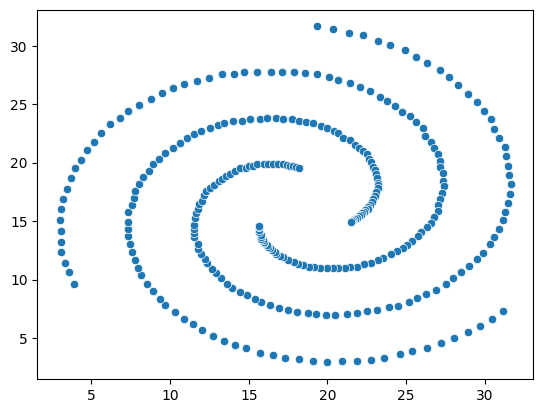

In [66]:
sns.scatterplot(x=cdf[:, 0], y=cdf[:, 1])

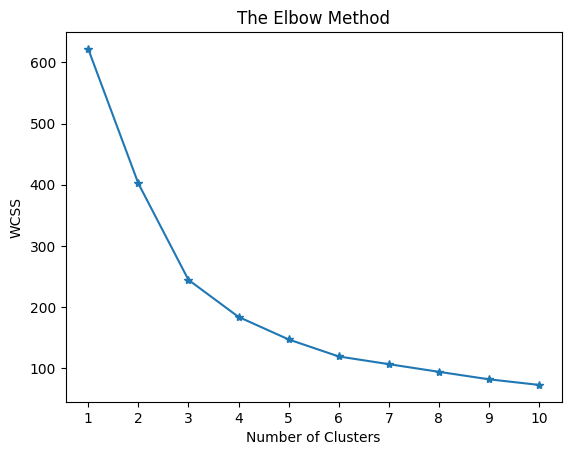

In [67]:
# would kmeans work well on this dataset?
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

wcss = []
for i in range(1, 11): 

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10))
    ])

    pipe.fit(cdf)
    wcss.append(pipe.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

[0 1 2]


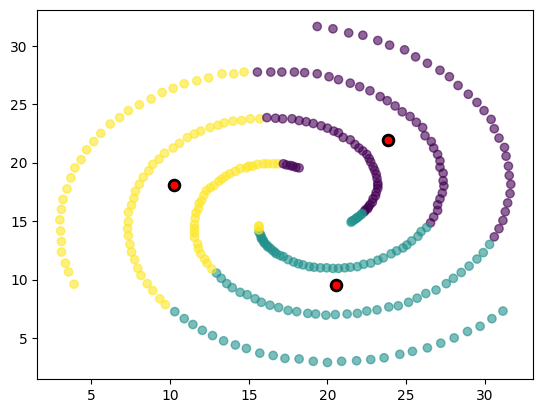

In [68]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3]


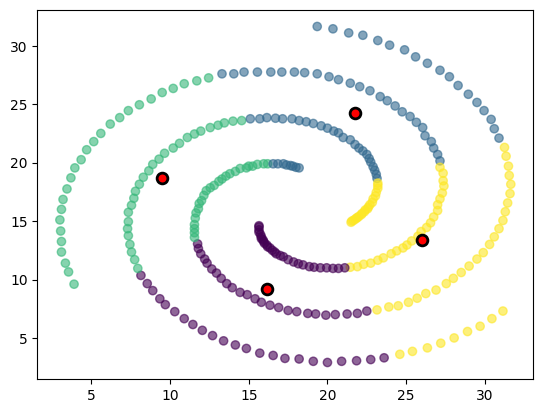

In [69]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3 4]


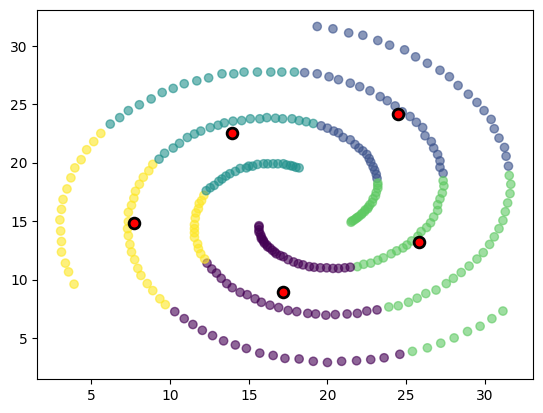

In [70]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

## as can be seen kmeans has a lot of problems with these king of datasets

In [72]:
df = pd.read_csv('Path.csv')
print(df.shape)
df.head()

(299, 3)


,11.25,5.05,1
0,10.95,4.70,1
1,9.85,5.80,1
2,9.80,5.75,1
3,9.15,6.80,1
4,8.65,6.60,1


In [77]:
cdf = df.iloc[:, [0, 1]].values
cdf[:5]

array([[10.95,  4.7 ],
       [ 9.85,  5.8 ],
       [ 9.8 ,  5.75],
       [ 9.15,  6.8 ],
       [ 8.65,  6.6 ]])

<Axes: >

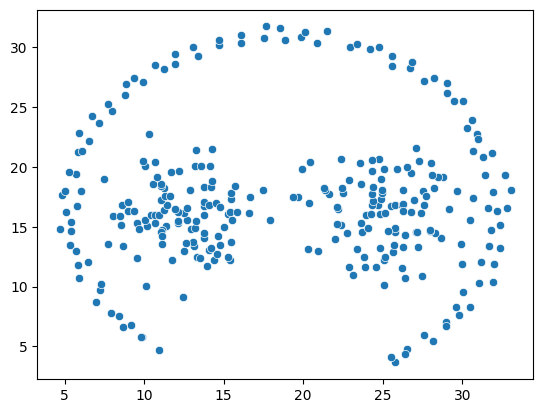

In [78]:
sns.scatterplot(x=cdf[:, 0], y=cdf[:, 1])

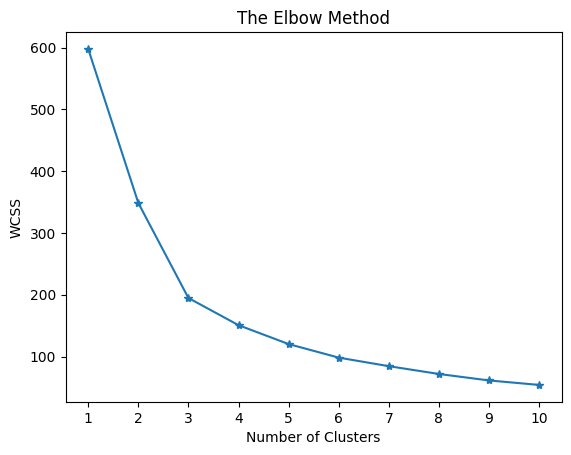

In [79]:
# would kmeans work well on this dataset?
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

wcss = []
for i in range(1, 11): 

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10))
    ])

    pipe.fit(cdf)
    wcss.append(pipe.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

[0 1 2]


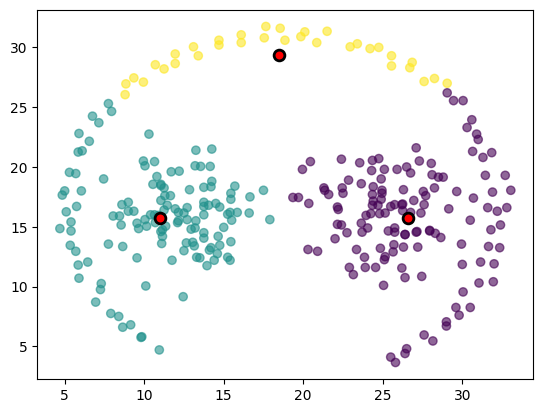

In [80]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3]


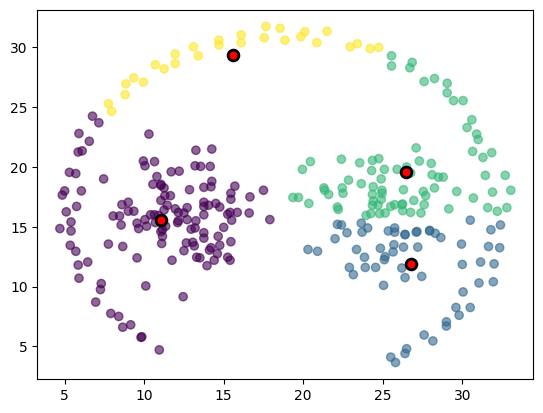

In [81]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3 4]


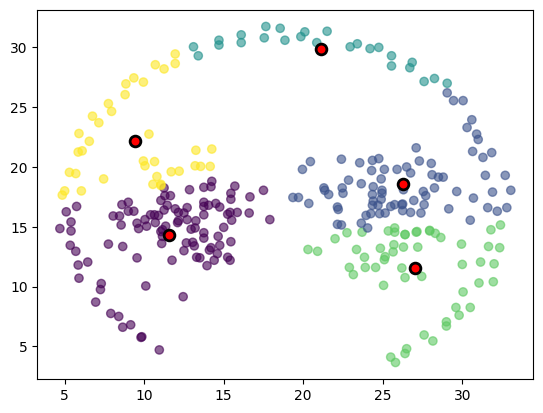

In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

In [83]:
df = pd.read_csv('Flame.csv')
print(df.shape)
df.head()

(239, 3)


,1.85,27.8,1
0,1.35,26.65,1
1,1.40,23.25,2
2,0.85,23.05,2
3,0.50,22.35,2
4,0.65,21.35,2


In [84]:
cdf = df.iloc[:, [0, 1]].values
cdf[:5]

array([[ 1.35, 26.65],
       [ 1.4 , 23.25],
       [ 0.85, 23.05],
       [ 0.5 , 22.35],
       [ 0.65, 21.35]])

<Axes: >

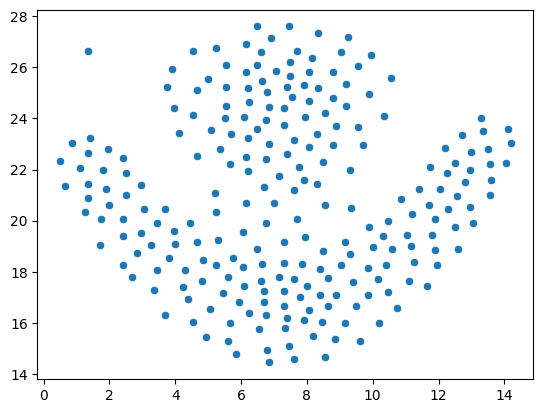

In [85]:
sns.scatterplot(x=cdf[:, 0], y=cdf[:, 1])

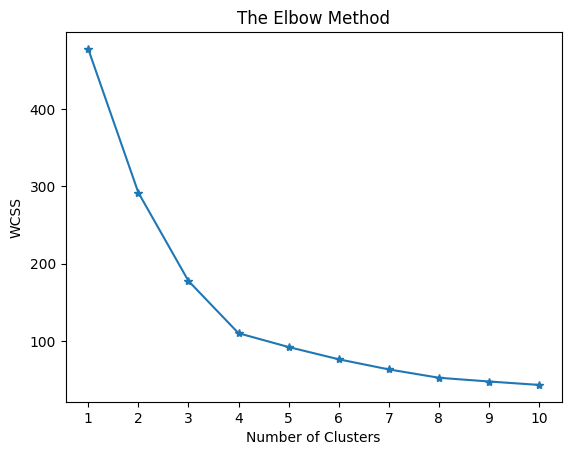

In [86]:
# would kmeans work well on this dataset?
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

wcss = []
for i in range(1, 11): 

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10))
    ])

    pipe.fit(cdf)
    wcss.append(pipe.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

[0 1 2]


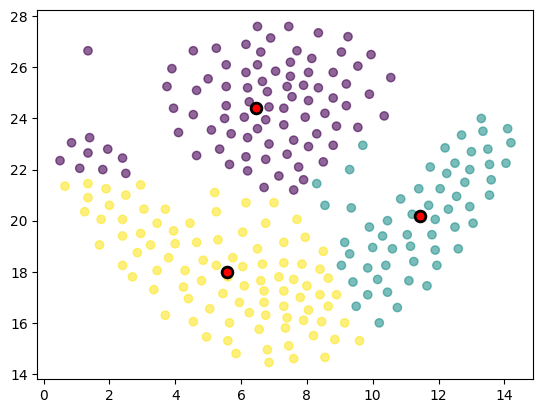

In [87]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3]


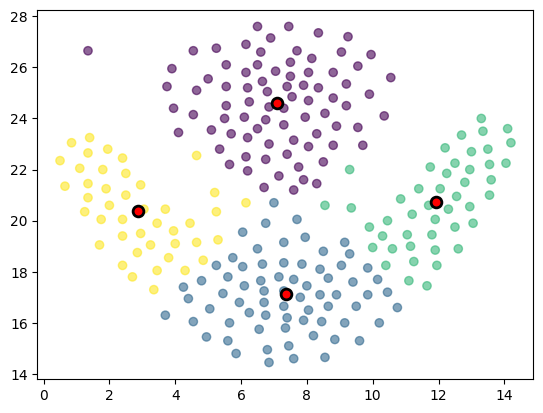

In [88]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3 4]


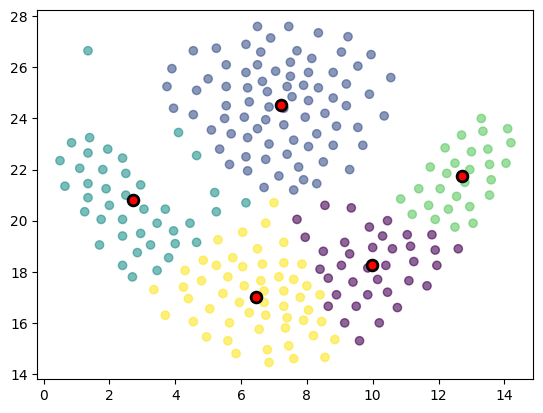

In [89]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

### as we experimented in different datasets, we found out that kmeans is bad at handling datasets that don't have common shapes

# Third limitation:
kmeans is bad at handling data sets that have different densities through the dattasets

In [90]:
df = pd.read_csv('Artificial.csv')
print(df.shape)
df.head()

(1008, 3)


,8.04731,-4.88662,0
0,11.23750,3.017460,0
1,5.11050,0.269883,0
2,6.34456,-3.718320,0
3,9.09493,2.028360,0
4,8.01686,-2.264840,0


In [91]:
cdf = df.iloc[:, [0, 1]].values
cdf[:5]

array([[11.2375  ,  3.01746 ],
       [ 5.1105  ,  0.269883],
       [ 6.34456 , -3.71832 ],
       [ 9.09493 ,  2.02836 ],
       [ 8.01686 , -2.26484 ]])

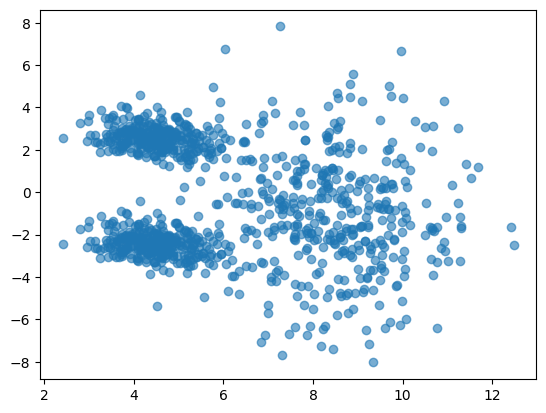

In [98]:
# it is apparent that data points in some parts are much denser and have more density
# in these king of datasets we can't use kmeans
plt.scatter(cdf[:, 0], cdf[:, 1], alpha=0.6)

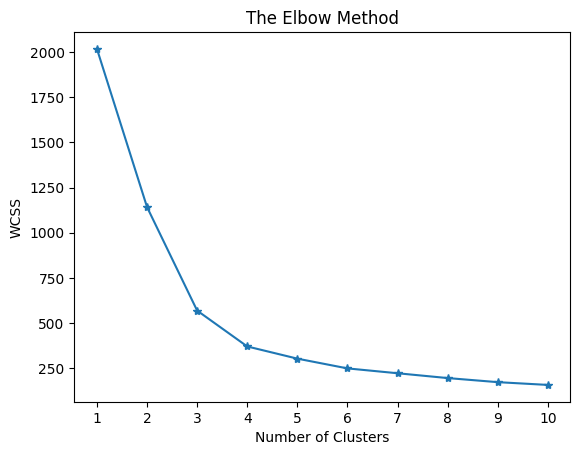

In [99]:
# would kmeans work well on this dataset?
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

wcss = []
for i in range(1, 11): 

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10))
    ])

    pipe.fit(cdf)
    wcss.append(pipe.named_steps['kmeans'].inertia_)

plt.plot(range(1, 11), wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show() 

[0 1 2]


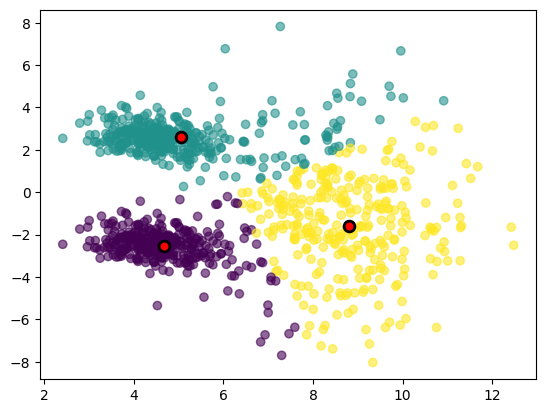

In [100]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3]


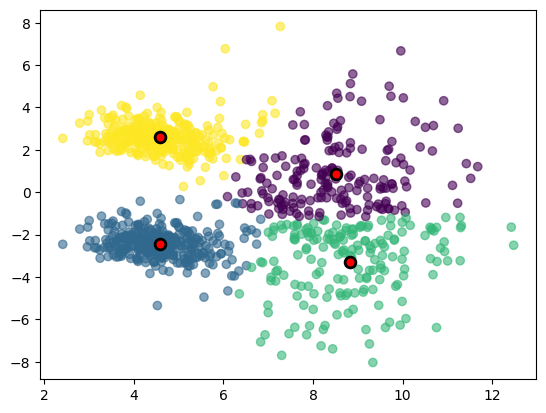

In [101]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);

[0 1 2 3 4]


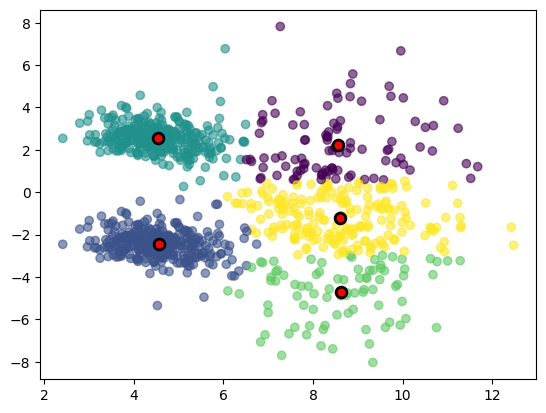

In [102]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

kmeans.fit(cdf)

labels = kmeans.labels_
print(np.unique(labels))

plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='r', edgecolors='k', s=60, linewidths=2);